Andres Mejia

2/1/23

Engr 114 

Lab 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


In [3]:
# drops the STATION and STATION_NAME columns from dataframe df.
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [5]:
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


# line plot

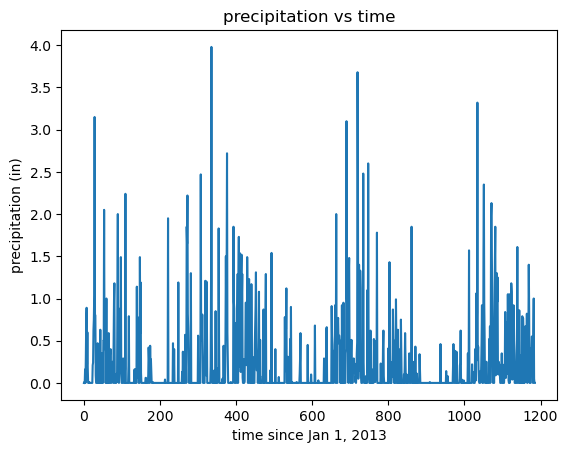

In [6]:
precip = wd[:,3]

fig, ax = plt.subplots()
ax.plot(precip)

ax.set_title('precipitation vs time')
ax.set_xlabel('time since Jan 1, 2013')
ax.set_ylabel('precipitation (in)')

plt.show()

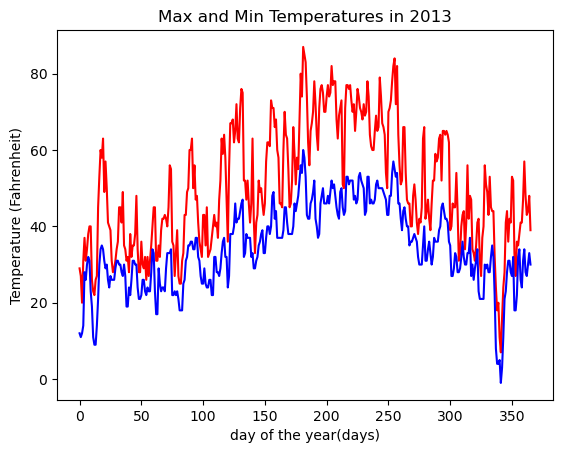

In [7]:
max_temp = wd[:366,6]
min_temp = wd[:366,7]

fig, ax1 = plt.subplots()
ax1.plot(max_temp, 'red')
ax1.plot(min_temp, 'blue')

ax1.set_title('Max and Min Temperatures in 2013')
ax1.set_xlabel('day of the year(days)')
ax1.set_ylabel('Temperature (Fahrenheit)')

plt.show()

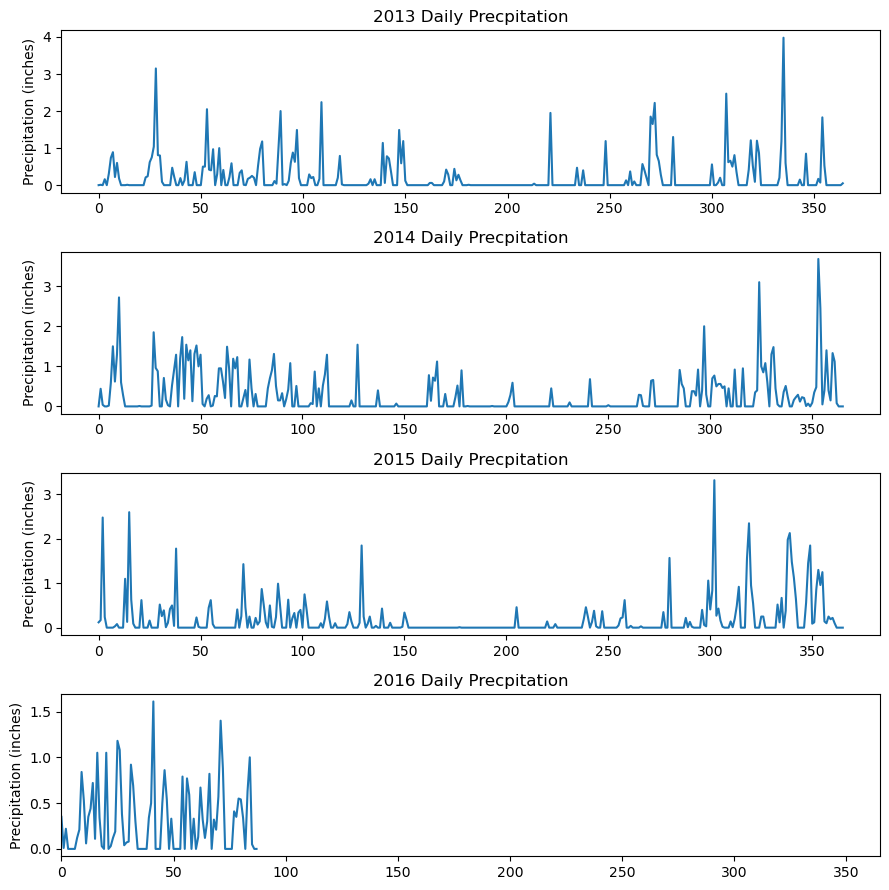

In [8]:
precip_2013 = wd[:365,3]
precip_2014 = wd[366:732,3]
precip_2015 = wd[732:1098,3]
precip_2016 = wd[1098:1464,3]

mask2013 = wd[:,1]=2013
#precip = wd[0:,3]
#precip_2013 = precip[mask2013]

#precip = wd[:,3]

#precip2013 = precip[precip_2013]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize=(9,9))
ax1.plot(precip_2013)
ax1.set_title("2013 Daily Precpitation")
ax1.set_ylabel('Precipitation (inches)')


ax2.plot(precip_2014)
ax2.set_title("2014 Daily Precpitation")
ax2.set_ylabel('Precipitation (inches)')

ax3.plot(precip_2015)
ax3.set_title("2015 Daily Precpitation")
ax3.set_ylabel('Precipitation (inches)')

ax4.plot(precip_2016)
ax4.set_title("2016 Daily Precpitation")
ax4.set_ylabel('Precipitation (inches)')
ax4.set_xlim([0,365])

plt.tight_layout()
plt.show()

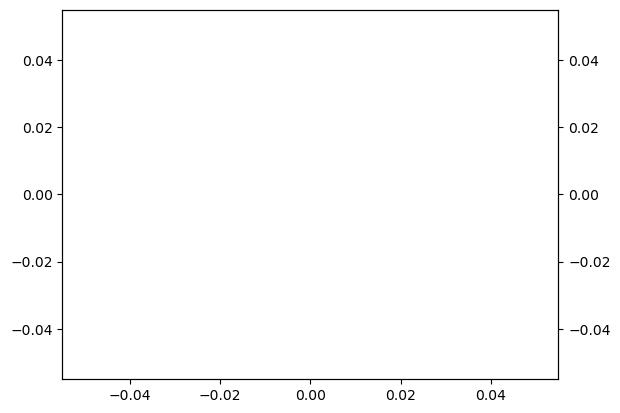

In [9]:
mask13 = wd[:,0]==2013
mask_nov = wd[:,1] >10
mask_winter13 = np.logical_and(mask13,mask_nov)

mask14 = wd[:,0]==2014
mask_feb = wd[:,1] <3
mask_winter14 = np.logical_or(mask14,mask_feb)

snowdepth = wd[:,4]
snowfall = wd[:,5]

winter13_14 = np.logical_and(mask_winter13,mask_winter14)
# winter14 = np.logical_and(mask14,mask_winter)

snowfall_13 = snowfall[winter13_14]
snowdepth_13 = snowdepth[winter13_14]

fig, ax1 = plt.subplots()
ax1.plot(snowfall_13)

ax2 = ax1.twinx()
ax2.plot(snowdepth_13)

plt.show()

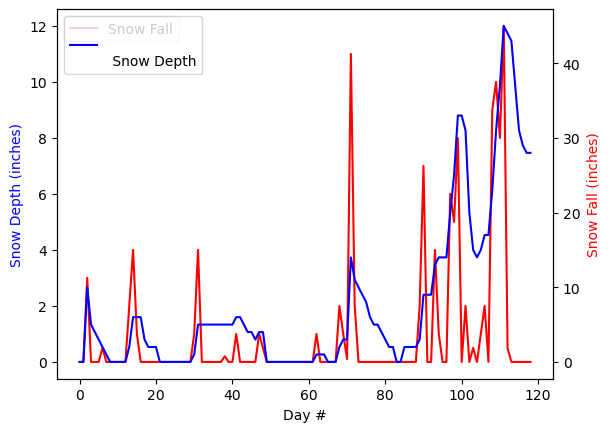

In [10]:
snowdepth = wd[305:424,4]
snowfall = wd[305:424,5]

fig, ax1 = plt.subplots()
ax1.plot(snowfall, 'red')
ax1.set_xlabel('Day #')
ax1.set_ylabel('Snow Depth (inches)', color='b')
ax1.legend(['Snow Fall'])

ax2 = ax1.twinx()
ax2.plot(snowdepth, 'blue')
ax2.set_ylabel('Snow Fall (inches)', color='r')
ax2.legend(['\n \n Snow Depth'],)

plt.show()

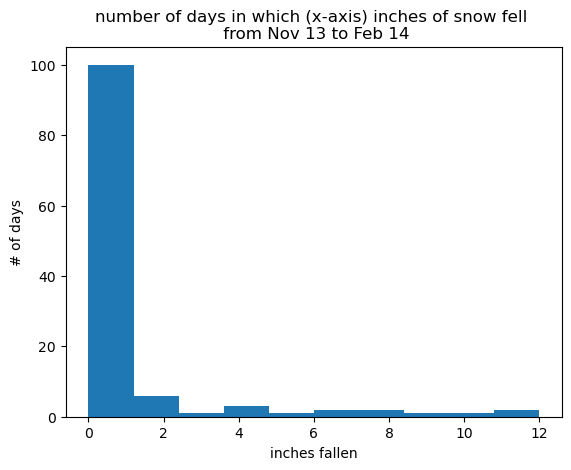

In [11]:
fig, ax = plt.subplots()
ax.hist(snowfall, bins=10)
ax.set_title('number of days in which (x-axis) inches of snow fell \n from Nov 13 to Feb 14')
ax.set_xlabel('inches fallen')
ax.set_ylabel('# of days')

plt.show()